# Neural Networks and Learning Machines
## Exercise 0 - Getting started with Python, Jupyter, and PyTorch

**This exercise shouldn't be submitted and will not be graded**

In this exercise we will do some simple programming tasks with neural networks with the aim to a) introduce you to the programming tools and libraries we'll be using and b) teach you some neural networks fundamentals and test your understanding of them.

In this exercise you will use a collection of perceptrons (i.e. a single-layer neural network) to classify the digits shown on a seven-segment display.

First we will implement the perceptrons using numpy and set the weights of those perceptrons by hand (without any actual machine learning) to classify the digits. This task will hopefully teach you the inner workings of individual artificial neurons as well as how changing weights and biases can make a network of neurons learn.

Second we will implement the same single-layer neural network in PyTorch and try to use machine learning to learn the correct weights. This task will hopefully teach you how to do basic network training in PyTorch.

Finally we will move away from the seven-segment display and try to train a larger artificial neural network (ANN) to tackle the MNIST dataset of handwritten digits. This task will hopefully prepare you to take on larger machine learning tasks with Pytorch as well as give you some insight into how machine learning can be used to solve problems that are diffcult (if not impossible) to program exactly right.

Before you start this exercise it is recommended that you read the "Getting ready for the Exercises" PDF that can be found on Canvas. The first cell below will check if everything seems to be installed correctly, if not, first check the PDF and then, if the problem persists, contact a TA.

Press the CONTROL + ENTER keys to run a selected block of code or text. Double click text blocks to edit them and press CONTROL + ENTER to turn it back into text. Whenever you've updated some code in a cell you need to run it again to execute those changes. If the changes in that cell is used in another cell you need to run that cell again as well.

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy

print('The installation seems to be working!')

The installation seems to be working!


## Seven-segment display

A seven-segment display [https://en.wikipedia.org/wiki/Seven-segment_display] can be used to display the different digits by turning the different segments (A,B,C,D,E,F) on or off. Your task is to design ten different perceptrons (which together make a single-layer neural network) that recognizes the ten different digits (0,1,2,3, ... ,9) represented by a seven-segment display. The input to each perceptron will be a vector {A,B,C,D,E,F} where A is 1 if segment A is turned on and 0 otherwise (and the same for all the other segments).

![Seven Segment Display](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/7_Segment_Display_with_Labeled_Segments.svg/225px-7_Segment_Display_with_Labeled_Segments.svg.png)

This means that for each digit you should create a perceptron and to check which digit the network thinks is displayed we input the vector {A,B,C,D,E,F} to each perceptron and then we check which perceptron gives the greatest output value. For each digit (0 to 9) the corresponding perceptron shoud have the greatest output value.

For example we want to input 2 into the network. The digit two corresponds to the vector {1,1,0,1,1,0,1} so we input that into each perceptron. Then we check the output value of each perceptron and see which one is greatest. If the perceptron at index 2 (the third pereptron since we have a perceptron for 0 as well) gives the greatest output then our networks is working for the input 2. Now we finally need to check the other digits as well.


For this task we use numpy rather than PyTorch.

After completing this exercise you should understand how an artificial neural network unit (like the perceptron) produces one scalar output from multiple input values, and how the weights and biases of determine the relation between input and output values.

**Exercise:** Complete the input vectors, the weight vectors, and biases. Then update the prediction calculation (forward pass) to include bias in the calculation

In [7]:
## First we need to define all the vectors corresponding to the various digits and add them to a list for easy access
# Please finish the list of digit vectors
x = [
    numpy.array([1,1,1,1,1,1,0]), # 0
    numpy.array([0,1,1,0,0,0,0]), # 1
    numpy.array([1,1,0,1,1,0,1]), # 2
    numpy.array([1,1,1,1,0,0,1]), # 3
    numpy.array([0,1,1,0,0,1,1]), # 4
    numpy.array([1,0,1,1,0,1,1]), # 5
    numpy.array([0,0,1,1,1,1,1]), # 6
    numpy.array([1,1,1,0,0,0,0]), # 7
    numpy.array([1,1,1,1,1,1,1]), # 8
    numpy.array([1,1,1,0,0,1,1]), # 9
]

# And we print one of the vectors to show you how to get a specific vector
print(f'Digit 5 corresponds to the vector {x[5]}')

Digit 5 corresponds to the vector [1 0 1 1 0 1 1]


In [8]:
## Second we need to create ten perceptron with weights and biases
# You also need to figure out which weights and biases to use for each perceptron
# We've already created some of the perceptrons for you, but you need to create the rest
# While we're using integers for our weight you can use floating point numbers (real numbers) as well if you want

weights = [
    numpy.array([1,1,1,1,1,1,-1]), # 0
    numpy.array([-1,1,1,-1,-1,-1,-1]), # 1
    numpy.array([1,1,-1,1,1,-1,1]), # 2
    numpy.array([1,1,1,1,-1,-1,1]), # 3
    numpy.array([-1,1,1,-1,-1,1,1]), # 4
    numpy.array([1,-1,1,1,-1,1,1]), # 5
    numpy.array([0,0,1,1,1,1,1]), # 6
    numpy.array([1,1,1,-1,-1,-1,-1]), # 7
    numpy.array([1,1,1,1,1,1,1]), # 8
    numpy.array([1,1,1,-1,-1,1,1]), # 9
    
]

biases = [
    0, # 0
    1, # 1
    0.1, # 2
    0.3, # 3
    0.5, # 4
    0.2, # 5
    0, # 6
    0.8, # 7
    0, # 8
    0.4, # 9
]

In [8]:
## Finally let's test our perceptrons
# The line computing the output of each perceptron is not using bias so you need to add that as well
# If the correct perceptron doesn't have the greatest output for one or more digits then go back and
#  edit the weights and biases in the previous cell (or check that the vectors are implemented correctly).
# Remember to run a cell again (CONTROL + ENTER) if you update it

debug = False # Set this to True if the predictions are wrong to get a more detailed output

for digit in range(10): # For each digit between 0 and 9 (range(n) gives a range (almost a list) of each number between 0 and n (excluding n)
    vector = x[digit] # Get the correct vector representation of the digit
    
    outputs = [] # Create an empty list to put the perceptrons' outputs in
    for w, b in zip(weights, biases): # For each weight and bias in the lists (zip takes two lists [x1,x2,...] [y1,y2,...] and makes a new list [(x1,y1),(x2,y2),...]) 
        
        # CHANGE THIS LINE TO ADD BIASES AS WELL
        print(w, "shape w : ",numpy.shape(w))
        print(vector, "shape vec : ",numpy.shape(vector))
        output = w.dot(w * vector + b) # Calculating the output of the perceptron with weight w and bias b
        
        outputs.append(output) # Adding the output to the list of outputs
    prediction = outputs.index(max(outputs)) # Get prediction by taking the index of the output value with maximum input
    
    print(f'Digit {digit} was predicted to be {prediction}') # This is an f-string with notation f'text {variable1} more text {variable2}'
    
    if debug: # If debug is True
        print(f'Outputs for all perceptrons for the digit {digit}: {outputs}')
        print() # Add a newline for formating

[ 1  1  1  1  1  1 -1] shape w :  (7,)
[1 1 1 1 1 1 0] shape vec :  (7,)
[-1  1  1 -1 -1 -1 -1] shape w :  (7,)
[1 1 1 1 1 1 0] shape vec :  (7,)
[ 1  1 -1  1  1 -1  1] shape w :  (7,)
[1 1 1 1 1 1 0] shape vec :  (7,)
[ 1  1  1  1 -1 -1  1] shape w :  (7,)
[1 1 1 1 1 1 0] shape vec :  (7,)
[-1  1  1 -1 -1  1  1] shape w :  (7,)
[1 1 1 1 1 1 0] shape vec :  (7,)
[ 1 -1  1  1 -1  1  1] shape w :  (7,)
[1 1 1 1 1 1 0] shape vec :  (7,)
[0 0 1 1 1 1 1] shape w :  (7,)
[1 1 1 1 1 1 0] shape vec :  (7,)
[ 1  1  1 -1 -1 -1 -1] shape w :  (7,)
[1 1 1 1 1 1 0] shape vec :  (7,)
[1 1 1 1 1 1 1] shape w :  (7,)
[1 1 1 1 1 1 0] shape vec :  (7,)
[ 1  1  1 -1 -1  1  1] shape w :  (7,)
[1 1 1 1 1 1 0] shape vec :  (7,)
Digit 0 was predicted to be 9
[ 1  1  1  1  1  1 -1] shape w :  (7,)
[0 1 1 0 0 0 0] shape vec :  (7,)
[-1  1  1 -1 -1 -1 -1] shape w :  (7,)
[0 1 1 0 0 0 0] shape vec :  (7,)
[ 1  1 -1  1  1 -1  1] shape w :  (7,)
[0 1 1 0 0 0 0] shape vec :  (7,)
[ 1  1  1  1 -1 -1  1] shape w :  (

In [9]:
print(weights)

[array([ 1,  1,  1,  1,  1,  1, -1]), array([-1,  1,  1, -1, -1, -1, -1]), array([ 1,  1, -1,  1,  1, -1,  1]), array([ 1,  1,  1,  1, -1, -1,  1]), array([-1,  1,  1, -1, -1,  1,  1]), array([ 1, -1,  1,  1, -1,  1,  1]), array([0, 0, 1, 1, 1, 1, 1]), array([ 1,  1,  1, -1, -1, -1, -1]), array([1, 1, 1, 1, 1, 1, 1]), array([ 1,  1,  1, -1, -1,  1,  1])]


## Training with Pytorch

In order to train a model with machine learning we require one thing above all else: data
We need data that contains information that we can use to make our models learn whatever task we have at hand.
If we want to make a neural network play chess for example our data might be millions of board states and the recommended move and we then hope the network will learn to calculate what a good move would be for a given board state.
In our case we want to simply learn the wegiths and biases to correctly classify the digit of a seven-segment display.
For this task we have all the data we could possibly need: All digits and their corresponding vectors. Since we want to predict the digit based on its vector we'll use the vectors as our data and the digits as the labels.

Then we need to create the network in PyTorch which is really simple as it is just a single linear neural network layer.
This corresponds to the PyTorch model [torch.nn.Linear](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) which you can have a look at in the [PyTorch documentation](https://pytorch.org/docs/stable/index.html). Whenever you encounter a new PyTorch function or class it's usually a good idea to look it up in the documentation. If you wonder if a particular machine learning feature exists in PyTorch you can also search in the documentation for it or use the more brute force method of Googling "\<machine learning feature\> in pytorch".

**Excercise:** Set the correct input and ouput sizes to the network to input a seven segment display vector and output a vector of predictions for each digit. Also look through the training code to make sure you understand each step


In [9]:
## Data and labels
# You don't need to edit this code, we simply show you how, in this case, we create the data and labels we need

# A matrix (or vector) in PyTorch is usually represented by a Tensor
# Create a Tensor with our digit vectors
data = torch.Tensor(x) # A Tensor can be created by simply giving it a nested numpy array/list of numbers as input
data = data.detach() # Since we won't be changing the data during training we detach the Tensor from the computation graph

# Our labels will be the expected outputs of each perceptron for each digit
# This means we can't simply say "5" is our expected output, but rather that we want [0,0,0,0,0,1,0,0,0,0]
# This is called one-hot encoding where we have a vector where the value is one at the given index and zero everywhere else
# Since a matrix with one-hot representations of the corresponding index is simply an identity matrix, we use that as our labels
labels = torch.eye(10) # Get a matrix with one-hot representations of each digit in each row (an identity matrix)
labels = labels.detach() # Since we won't be changing the labels during training we detach the Tensor from the computation graph

C:\Users\darki\AppData\Local\Temp\ipykernel_12684\314178716.py:6: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:233.)
  data = torch.Tensor(x) # A Tensor can be created by simply giving it a nested numpy array/list of numbers as input


In [10]:
## The network
# We create a simple network from torch.nn.Linear

input_size = 7 # WHAT IS THE SIZE OF THE INPUT VECTOR OF THE NETWORK?
output_size = 10 # WHAT IS THE SIZE OF THE OUTPUT VECTOR OF THE NETWORK?

network = torch.nn.Linear(input_size, output_size) # Creating a single linear layer of a neural network with the given input and output sizes

Epoch 10 - Loss: 0.07721596211194992
Epoch 20 - Loss: 0.05581499636173248
Epoch 30 - Loss: 0.046205416321754456
Epoch 40 - Loss: 0.04113209247589111
Epoch 50 - Loss: 0.03810232877731323
Epoch 60 - Loss: 0.03609900549054146
Epoch 70 - Loss: 0.0346536785364151
Epoch 80 - Loss: 0.03353244066238403
Epoch 90 - Loss: 0.032611604779958725
Epoch 100 - Loss: 0.03182269632816315


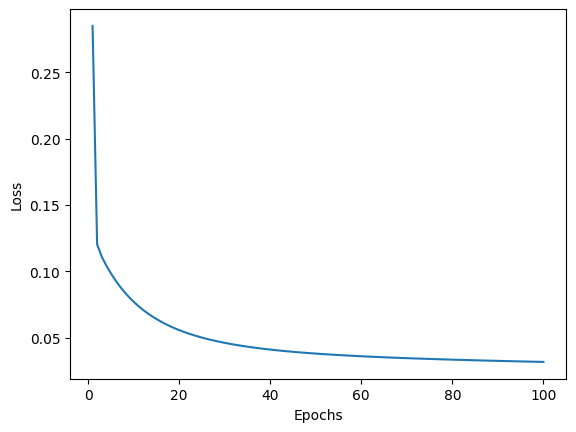

In [11]:
## Training the network
# You don't need to edit this code, we have given you the training loop to train the network

epochs = 100 # How many epochs (complete runs of the data) to train for. Since our dataset is small 100 seems reasonable
loss_function = torch.nn.MSELoss() # What function to use to calculate the loss given the prediction and labels
optimizer = torch.optim.SGD(network.parameters(), lr=1) # Function for updating the parameters of the network based on loss
learning_rate = 1 # How fast to optimize the network. Since our problem is quite small we can have a large learning rate, otherise 0.01 is usually standard

# Create a list to keep track of how the loss changes
losses = []

# For each epoch
for epoch in range(epochs):
    
    # Predict for each vector what digit they represent
    prediction = network(data)
    
    # Calculate the loss of the prediction by comparing to the expected output
    loss = loss_function(prediction, labels)

    # Backpropogate the loss through the network to find the gradients of all parameters
    loss.backward()

    # Update the parameters along their gradients
    optimizer.step()

    # Clear stored gradient values
    optimizer.zero_grad()

    # Add the loss to the total epoch loss (item() turns a PyTorch scalar into a normal Python datatype)
    losses.append(loss.item())

    #Print the epoch and loss every 10 epochs
    if epoch % 10 == 9:
        print(f'Epoch {epoch+1} - Loss: {loss}')
    
# Plot the training loss per epoch
plt.plot(range(1,epochs+1),losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


**Check your solution**: Execute the cell below to see whether the network managed to learn the correct predictions

In [12]:
## Testing the trained network
# You don't need to edit this code

with torch.no_grad(): # Since we're not training we don't want to calculate the gradients for this prediction
    prediction = network(data) # Let's make one final prediction of the data

for digit in range(10):
    print(f'Digit {digit} was predicted to be {torch.argmax(prediction[digit])}') # argmax gets the index with the greatest value

Digit 0 was predicted to be 0
Digit 1 was predicted to be 1
Digit 2 was predicted to be 2
Digit 3 was predicted to be 3
Digit 4 was predicted to be 4
Digit 5 was predicted to be 5
Digit 6 was predicted to be 6
Digit 7 was predicted to be 7
Digit 8 was predicted to be 8
Digit 9 was predicted to be 9


## Trying a larger dataset

While it might be redundant to use machine learning to learn the vectors of a seven-segment display, something we can already easily make a program for, there are many datasets out there for which it is difficult, if not impossible, for to program a solution for.
In those cases having enough data might be enough for a machine learning solution to learn how to solve the problem.
For example, I have no idea how to write a program to tell the difference between images of cats and dogs, but I could easily gather a thousand pictures of each, label them, and use that to train a neural network to figure it out for me.

One such dataset is the MNIST dataset of handwritten digits. MNIST consist of 70,000 grayscale images of size 28x28 pixels each. Our goal is to train a network that can recognize what digit an image represents.

The code below gets the dataset (downloads it if necessary) and displays one of the images.

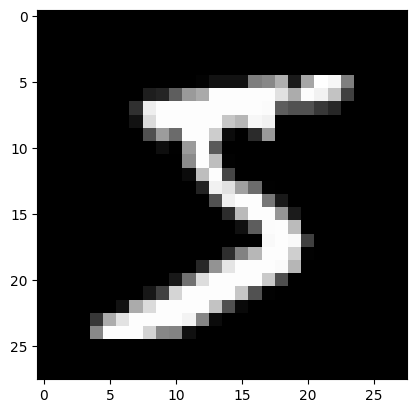

In [13]:
# Get the training split of the MNIST dataset, the ToTensor makes sure we get the data as tensors, not images
mnist_data = torchvision.datasets.MNIST('./', train=True, download=True, transform=torchvision.transforms.ToTensor())

# Create a DataLoader from the dataset that we'll use to get batches of data during training
mnist_loader = torch.utils.data.DataLoader(mnist_data, batch_size=1000, shuffle=False)

# Function that takes an MNIST tensor and shows the image
def plot_digit(data):
    # Transfrom the images into an appropriate shape for displaying
    data = data.view(28,28)
    plt.imshow(data, cmap='gray')
    plt.show()

# Get the first batch of images and labels from the DataLoader
images, labels = next(iter(mnist_loader))

# Plot the first image of the batch
plot_digit(images[0])

### Pytorch

In this course we will be using the deep learning framework **PyTorch**.
This exercise will be a light introduction to the framework, but to really get to know PyTorch we recommend this tutorial [https://pytorch.org/tutorials/beginner/pytorch_with_examples.html] or finding another tutorial that suits you better.


To solve this task you will need to improve the neural network provided below.
This can be done by adding or changing the modules that are part of nn.Sequential. A list of available modules can be found here: [https://pytorch.org/docs/stable/nn.html] though it's recommended that you stick with nn.Linear, nn.Sigmoid, nn.ReLU, nn.LeakyReLU, or similar modules. Feed-Forward networks (the type recommended for this task, we'll tell you more about that later) usually consist of nn.Linear separated by activation functions (like nn.Sigmoid, and nn.Linear). Each nn.Linear layer must have the input size (first parameter) of the previous layer's output size. E.g. nn.Linear(784, 50) could be followed by nn.Linear(50, 10). 

For inspiration, see the MNIST website [http://yann.lecun.com/exdb/mnist/] which contains some previously tested network architectures and the corresponding classification accuracy obtained.

Additionally, you might want to change the optimizer used; (List here: [https://pytorch.org/docs/stable/optim.html])
or loss function (List here: [https://pytorch.org/docs/stable/nn.html#loss-functions])

Note: Not all loss functions takes the same input so you might need to restructure the data to make it work.

Any network that you design will be randomly initialized and therefore bad at recognizing images initially, which you will experience when running the code below.

In [ ]:
# This code initializes the neural network

### EDIT CODE BELOW TO CHANGE THE NETWORK AND ITS OPTIMIZING PROCEDURE (AFTER TRAINING AND PREDICTING THE FIRST TIME) ###
# nn.Sequential can be given a list of neural networks modules

# This initial network has only two layers with a ReLU funtion in between.
# It has an input size equal to the size of the images (28x28 pixels = 784)
# and an output size equal to the number of classes (the number of digits = 10)
network = nn.Sequential(
    nn.Linear(784, 100), # First layer of the network takes the entire image and reduces it to 100 dimensions
    nn.ReLU(),
    nn.Linear(100, 10) # The second layer takes those 100 dimensions and reduces them into estimated values for each digit
)

# Initialize the optimizer
# In addition to changing optimizer you can try to change other parameters like learning rate (lr)
optimizer = optim.Adam(network.parameters(), lr=0.01)

# Initialize the loss function
loss_function = nn.MSELoss()

### EDIT CODE ABOVE TO CHANGE THE NETWORK AND ITS OPTIMIZING PROCEDURE ###

# An Embedding layer used for turning int into one-hot (0 -> [1,0,0,0,0,0,0,0,0,0], 5 -> [0,0,0,0,0,1,0,0,0,0])
to_onehot = nn.Embedding(10, 10) 
to_onehot.weight.data = torch.eye(10)

# Extract some images from the dataset and have the new predict what digit they are
def predict_on_images(iterator, images_to_show):
    for index in range(images_to_show):
        # Get the next batch of images
        images, labels = next(iterator)

        plot_digit(images[0])

        # Transform the images into a single list of pixels since our network takes that as its input
        input_tensor = images[0].view(1,784)
        # Run the input through our network to get a prediction
        prediction = network(input_tensor)
        # Extract which prediction had the highest probability
        guess = torch.argmax(prediction[0], dim=-1)
        # Show the predicted digit and the actual digit
        print(f'Prediction: {guess.item()} - Actual: {labels[0].item()}')

# Have the untrained network predict on some images
print('Predicting with the randomly initialized network before training to see what happens')
predict_on_images(iterator = iter(mnist_loader), images_to_show = 3)

### Training the network
Below is the training procedure. Neural networks are usually trained with backpropagation which works as follows (for now you don't need to understand the prodcedure, but you'll be expected to learn it in the course later on).
    1. Give the network the input and have it calculate a prediction.
    2. Calculate the loss/error by comparing the difference between the prediction and the target output.
    3. For the error E and each parameter w find their error gradient: (backpropagate the error)
\begin{equation*}
\frac{\partial E}{\partial w}
\end{equation*}
    4. Update the parameters according to their error gradient (since we know how this parameter affected the error we can change it to cause less error)
    5. Repeat from step 1 with new input
    
The code below **takes a while to execute**. Note the circle at the top-right corner of the notebook, just next to the name Python followed by the version number, like **Python 3**. When the circle is filled the code is still running. An open circle means that code is not running.

**Exercise:** Complete the training loop below and train the network. Then go back to where the network and other training parameters are defined and change things around and see if you can train with some other network architectures, loss functions, or optimizers.

*Hint:* Look at the training loop from the seven segment training to see how different parts are implemented

In [15]:
# Decide the number of epochs to train for (one epoch is one optimization iteration on the entire dataset)
epochs = 20

# For each epoch
for epoch in range(epochs):
    
    # For each batch of data (since the dataset is too large to run all data through the network at once)
    for batch_nr, (images, labels) in enumerate(mnist_loader):
        
        # Extract the labels and turn them into one-hot representation (note: not all loss functions needs this)
        labels = to_onehot(labels)
        
        # Reshape the images to a single vector (28*28 = 784)
        images = images.view(-1,784)
        
        # Predict for each digit in the batch what class they belong to
        prediction = network(images) # WRITE THE CODE TO RUN THE IMAGES THROUGH THE NETWORK
        
        # Calculate the loss of the prediction by comparing to the expected output
        loss = loss_function(prediction, labels) # WRITE THE CODE TO CALCULATE THE LOSS BY COMPARING THE PREDICTION TO THE ACTUAL LABELS
        
        # Backpropagate the loss through the network to find the gradients of all parameters
        loss.backward() # WRITE CODE TO BACKPROPOGATE THE LOSS
        
        # Update the parameters along their gradients
        optimizer.step() # WRITE THE CODE TO OPTIMIZE PARAMETERS BY STEPPING ALONG THE GRADIENTS
        
        # Clear stored gradient values
        optimizer.zero_grad() # WRITE THE CODE TO REMOVE THE USED GRADIENTS BEFORE THE NEXT ITERATION OF THE LOOP
        
        #Print the epoch, batch, and loss
        print(
            '\rEpoch {} [{}/{}] - Loss: {}'.format(
                epoch+1, batch_nr+1, len(mnist_loader), loss
            ),
            end=''
        )

Epoch 3 [42/60] - Loss: 0.019569780677556996

KeyboardInterrupt: 

### Testing the network
To see whether our network have been trained properly we want to test it on new data, which has not been used during training. In Exercise 1 you'll need to implement a proper testing procedure, but for now we simplify things and just predict a number of digits to see whether it looks fairly alright.

Likely the network will not get everyhting correct, but that's to be expected with the few epochs of training and non-optimal setup.

**Exercise:** Can you improve the network architecture to improve the classification results?

In [ ]:
# Have the trained network predict on a number of images
predict_on_images(iterator = iter(mnist_loader), images_to_show = 1)